In [1]:
import sys; sys.path.append('..')
from mvtecad_test import *
from fastai.callbacks import SaveModelCallback
fastai_progress_as_text()

PATH = Path('/mnt/dataset/mvtec_ad')

mvtecad = MVTecADTest(PATH, test_type='binary_with_one_defect', skip_data_creation=True)

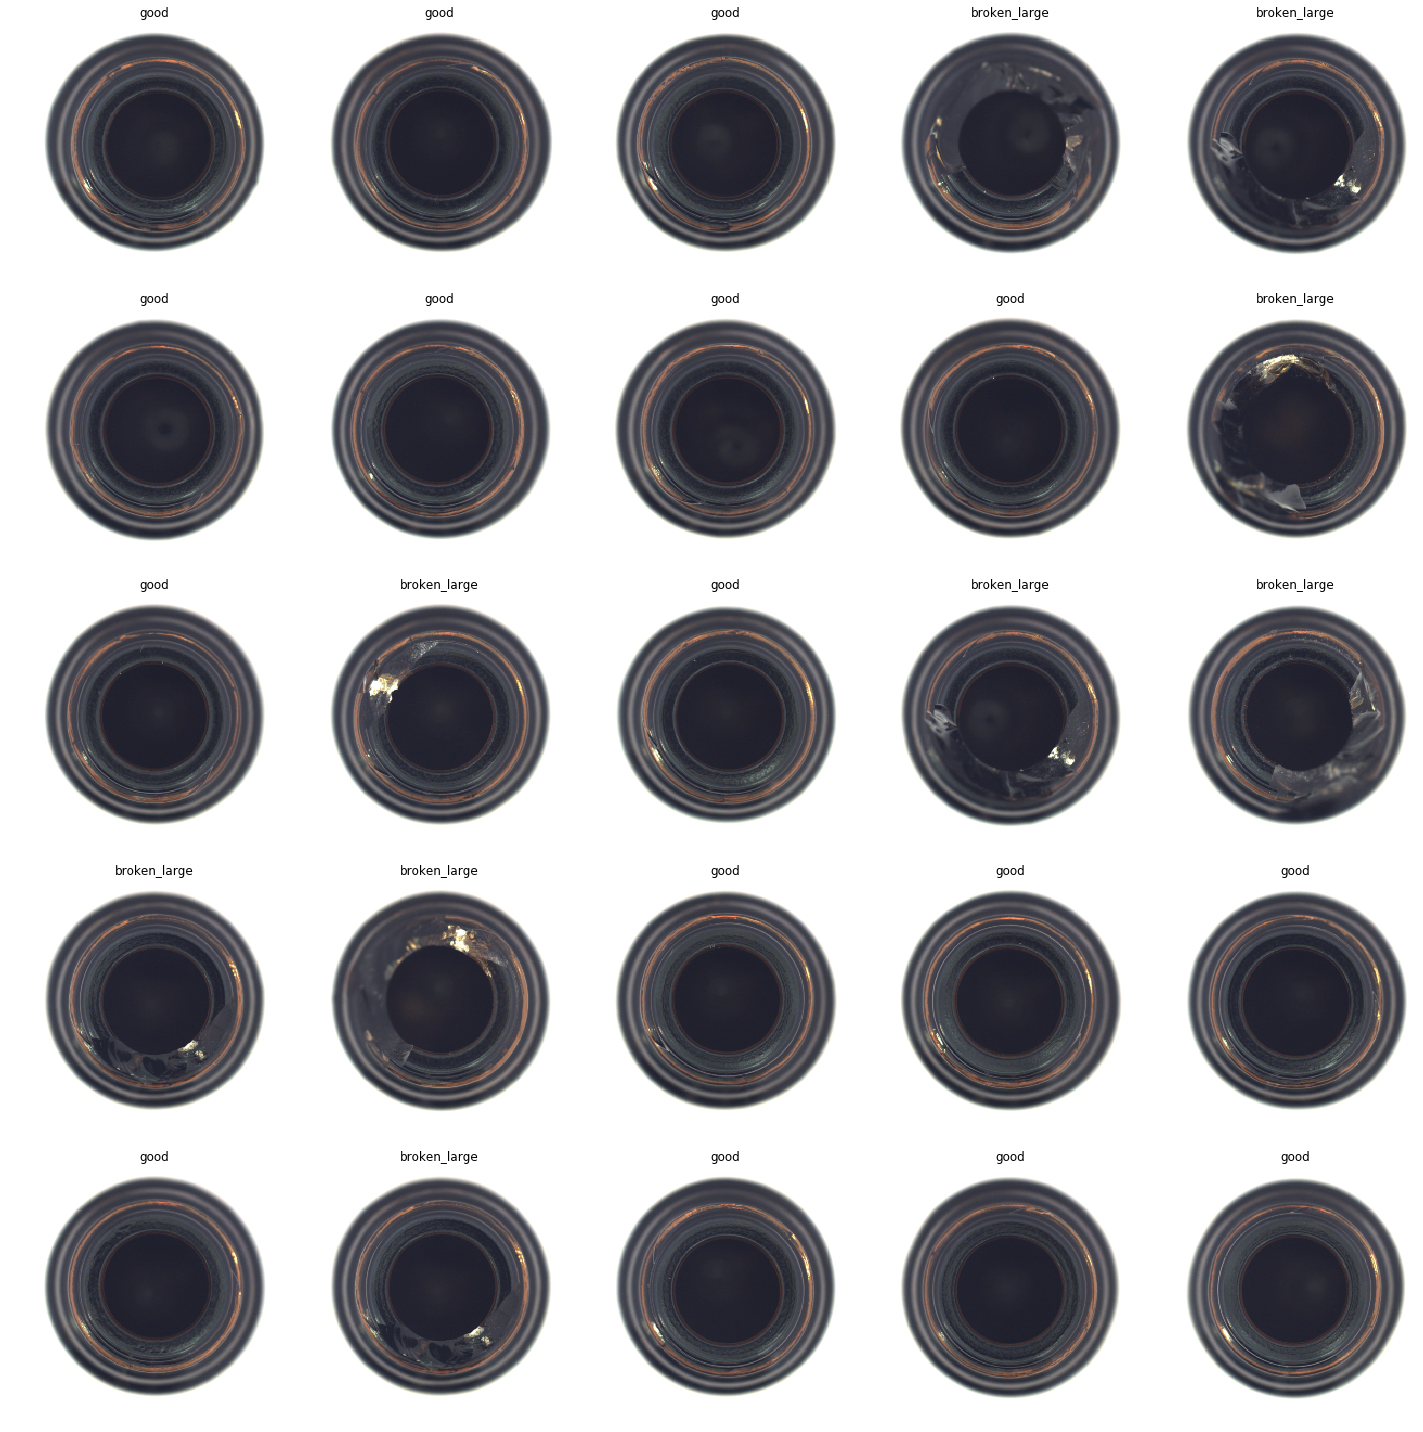

In [2]:
mvtecad.set_test(0, 0)
mvtecad.databunch().show_batch()

In [ ]:
def learner_conventional(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy).mixup()
    learn.fit_one_cycle(5)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    #learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_L2ConstrainedNet(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy).mixup()
    learn.model = L2ConstrainedNet(learn.model)
    learn.fit_one_cycle(5)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    #learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_ArcFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, ArcMarginProduct, m=0.5)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(5)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    #learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_CosFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, AddMarginProduct, m=0.4)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(5)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    #learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_SphereFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, SphereProduct, m=int(4))
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(5)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    #learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_CenterLoss(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.loss_func = WrapCenterLoss(learn, train_data, weight_cent=1/8)
    learn.fit_one_cycle(5)
    learn.unfreeze()
    learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    #learn.fit_one_cycle(5, callbacks=[SaveModelCallback(learn)])
    return learn

model_defs = {
    'Conventional': learner_conventional,
    'L2Constrained': learner_L2ConstrainedNet,
    'ArcFace': learner_ArcFace,
    'CosFace': learner_CosFace,
    'SphereFace': learner_SphereFace,
    'CenterLoss': learner_CenterLoss,
}
for name, learner_fn in model_defs.items():
    mvtecad.do_tests(name, learner_fn, visualize=[5, 9, 13])

# Stat: AUC


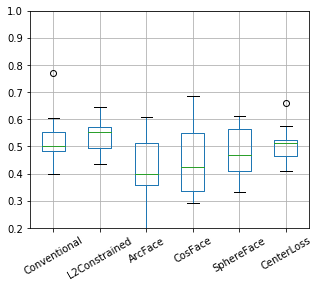

,Conventional,L2Constrained,ArcFace,CosFace,SphereFace,CenterLoss
bottle,0.771429,0.571825,0.184524,0.684921,0.571429,0.57381
cable,0.503654,0.571214,0.487631,0.29404,0.612912,0.514055
capsule,0.483446,0.57858,0.561428,0.546869,0.447746,0.5
carpet,0.604735,0.546348,0.52508,0.426565,0.361356,0.518058
grid,0.495823,0.492481,0.319549,0.329574,0.444027,0.451128
hazelnut,0.580536,0.646786,0.395179,0.421429,0.419464,0.503214
leather,0.441576,0.436821,0.387568,0.5518,0.529721,0.526664
metal_nut,0.474829,0.619257,0.376833,0.2913,0.486559,0.409824
pill,0.55551,0.557692,0.444763,0.678532,0.333197,0.511729
screw,0.528797,0.46362,0.303853,0.374872,0.408793,0.441176


# Stat: Normalized distances


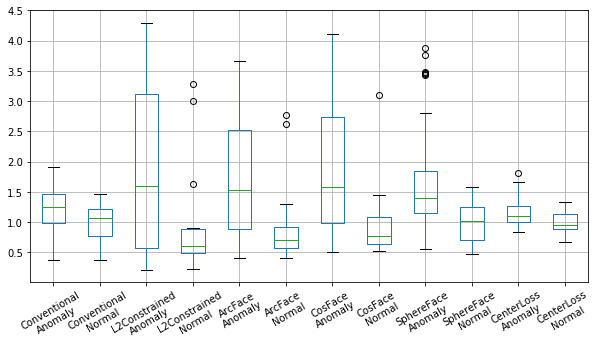

In [4]:
normalized_anomaly_distances, normalized_normal_distances, aucs = mvtecad.test_summary()

In [6]:
paper_compatible_table2(mvtecad)

,Conventional,L2Constrained,ArcFace,CosFace,SphereFace,CenterLoss
index,,,,,,
carpet-TPR,0.449438,0.651685,0.325843,0.056180,1.000000,0.303371
carpet-TNR,0.785714,0.428571,0.750000,1.000000,0.035714,0.857143
grid-TPR,0.631579,0.701754,0.000000,0.000000,0.140351,0.473684
grid-TNR,0.476190,0.333333,1.000000,1.000000,0.904762,0.571429
leather-TPR,0.836957,0.000000,0.054348,0.706522,0.521739,0.771739
leather-TNR,0.218750,1.000000,0.968750,0.437500,0.593750,0.312500
tile-TPR,0.273810,0.750000,0.583333,0.011905,0.404762,0.869048
tile-TNR,0.787879,0.363636,0.636364,1.000000,0.696970,0.181818
wood-TPR,0.566667,0.233333,0.033333,0.350000,0.000000,0.500000
